In [11]:
# Import necessary libraries
%matplotlib inline
from copy import deepcopy
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt

In [12]:
# Importing the dataset
data = pd.read_csv('wine_pca.csv', header = None)
# print(data)

In [13]:
# Change categorical data to number 0-2
data[2] = pd.Categorical(data[2])
data[2] = data[2].cat.codes

(177,)


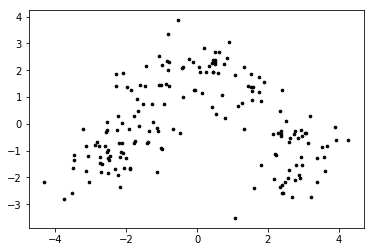

In [14]:
# Getting the values and plotting it
f1 = data[0].values
f2 = data[1].values
category = data[2].values
data = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='black', s=7)
print(f1.shape)

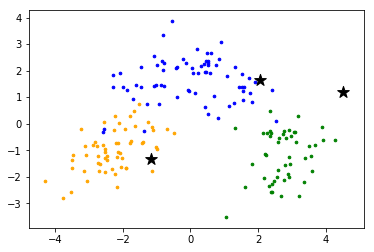

In [20]:
# Number of clusters
k = 3
# Number of training data
n = data.shape[0]
# Number of features in the data
c = data.shape[1]
# Generate random centers
mean = np.mean(data, axis = 0)
std = np.std(data, axis = 0)
centers = np.random.randn(k,c)*std + mean

# Plot the data and the centers generated as random
colors=['orange', 'blue', 'green']

for i in range(n):
    plt.scatter(data[i, 0], data[i,1], s=7, color = colors[int(category[i])])
plt.scatter(centers[:,0], centers[:,1], marker='*', c='black', s=150)

# print(data)

In [21]:
centers_old = np.zeros(centers.shape) # to store old centers
centers_new = deepcopy(centers) # Store new centers

clusters = np.zeros(n)
distances = np.zeros((n,k))

error = np.linalg.norm(centers_new - centers_old)
# print(error)
sum = 0
j = 0
# iterate till error is null
while error != 0:
    # Measure the distance to every center
    for i in range(k):
        distances[:,i] = np.linalg.norm(data - centers[i], axis=1)
        sum += distances[:,i]*distances[:,i]
#         print(distances[:,i])
    # Assign all training data to closest center
    clusters = np.argmin(distances, axis = 1)
    centers_old = deepcopy(centers_new)
    # Calculate mean for every cluster and update the center
    for i in range(k):
        centers_new[i] = np.mean(data[clusters == i], axis=0)
    error = np.linalg.norm(centers_new - centers_old)
#     print(error)
# print(sum)

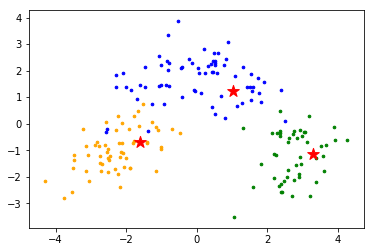

In [22]:
# Plot the data and the centers
colors=['orange', 'blue', 'green']
for i in range(n):
    plt.scatter(data[i, 0], data[i,1], s=7, color = colors[int(category[i])])
plt.scatter(centers_new[:,0], centers_new[:,1], marker='*', c='red', s=150)